In [1]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("datasets/Wine_Quality_Data.csv")
data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [4]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
data['color'] = data['color'].replace({'white' : 0, 'red' : 1}).astype(int)

In [6]:
feature_cols = [x for x in data.columns if x not in 'color']

In [7]:
feature_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuffle_split = StratifiedShuffleSplit(n_splits = 1, test_size = 1000, random_state = 42)

train_idx, test_idx = next(strat_shuffle_split.split(data[feature_cols], data['color']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

In [9]:
y_train.value_counts(normalize = True).sort_index()

color
0    0.753866
1    0.246134
Name: proportion, dtype: float64

In [10]:
y_test.value_counts(normalize = True).sort_index()

color
0    0.754
1    0.246
Name: proportion, dtype: float64

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt = dt.fit(X_train, y_train)

In [12]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'Accuracy' : accuracy_score(y_true, y_pred),
                      'Precision' : precision_score(y_true, y_pred),
                      'Recall' : recall_score(y_true, y_pred),
                      'F1 score' : f1_score(y_true, y_pred)},
                      name = label)

In [14]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis = 1)
train_test_full_error

,train,test
Accuracy,0.999818,0.984000
Precision,0.999261,0.963710
Recall,1.000000,0.971545
F1 score,0.999631,0.967611


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : range(1, dt.tree_.max_depth+1, 2),
              'max_features' : range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)

GR.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 23, 2),
                         'max_features': range(1, 13)},
             scoring='accuracy')

In [16]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(99, 7)

In [17]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [18]:
train_test_gr_error

,train,test
Accuracy,0.995816,0.989000
Precision,0.998501,0.983539
Recall,0.984479,0.971545
F1 score,0.991440,0.977505


In [19]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [20]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [21]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(7953, 25)

In [22]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.00055,2.659874


[Text(0.5, 0, 'Test'), Text(0, 0.5, 'Predict'), (0.0, 35.0), (0.0, 35.0)]

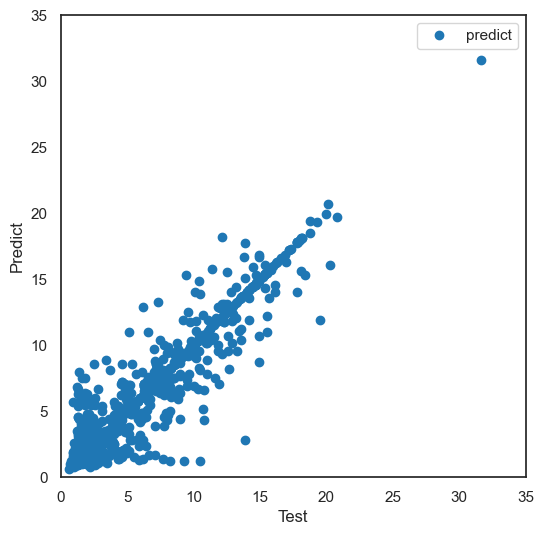

In [23]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize = (6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35))

In [24]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

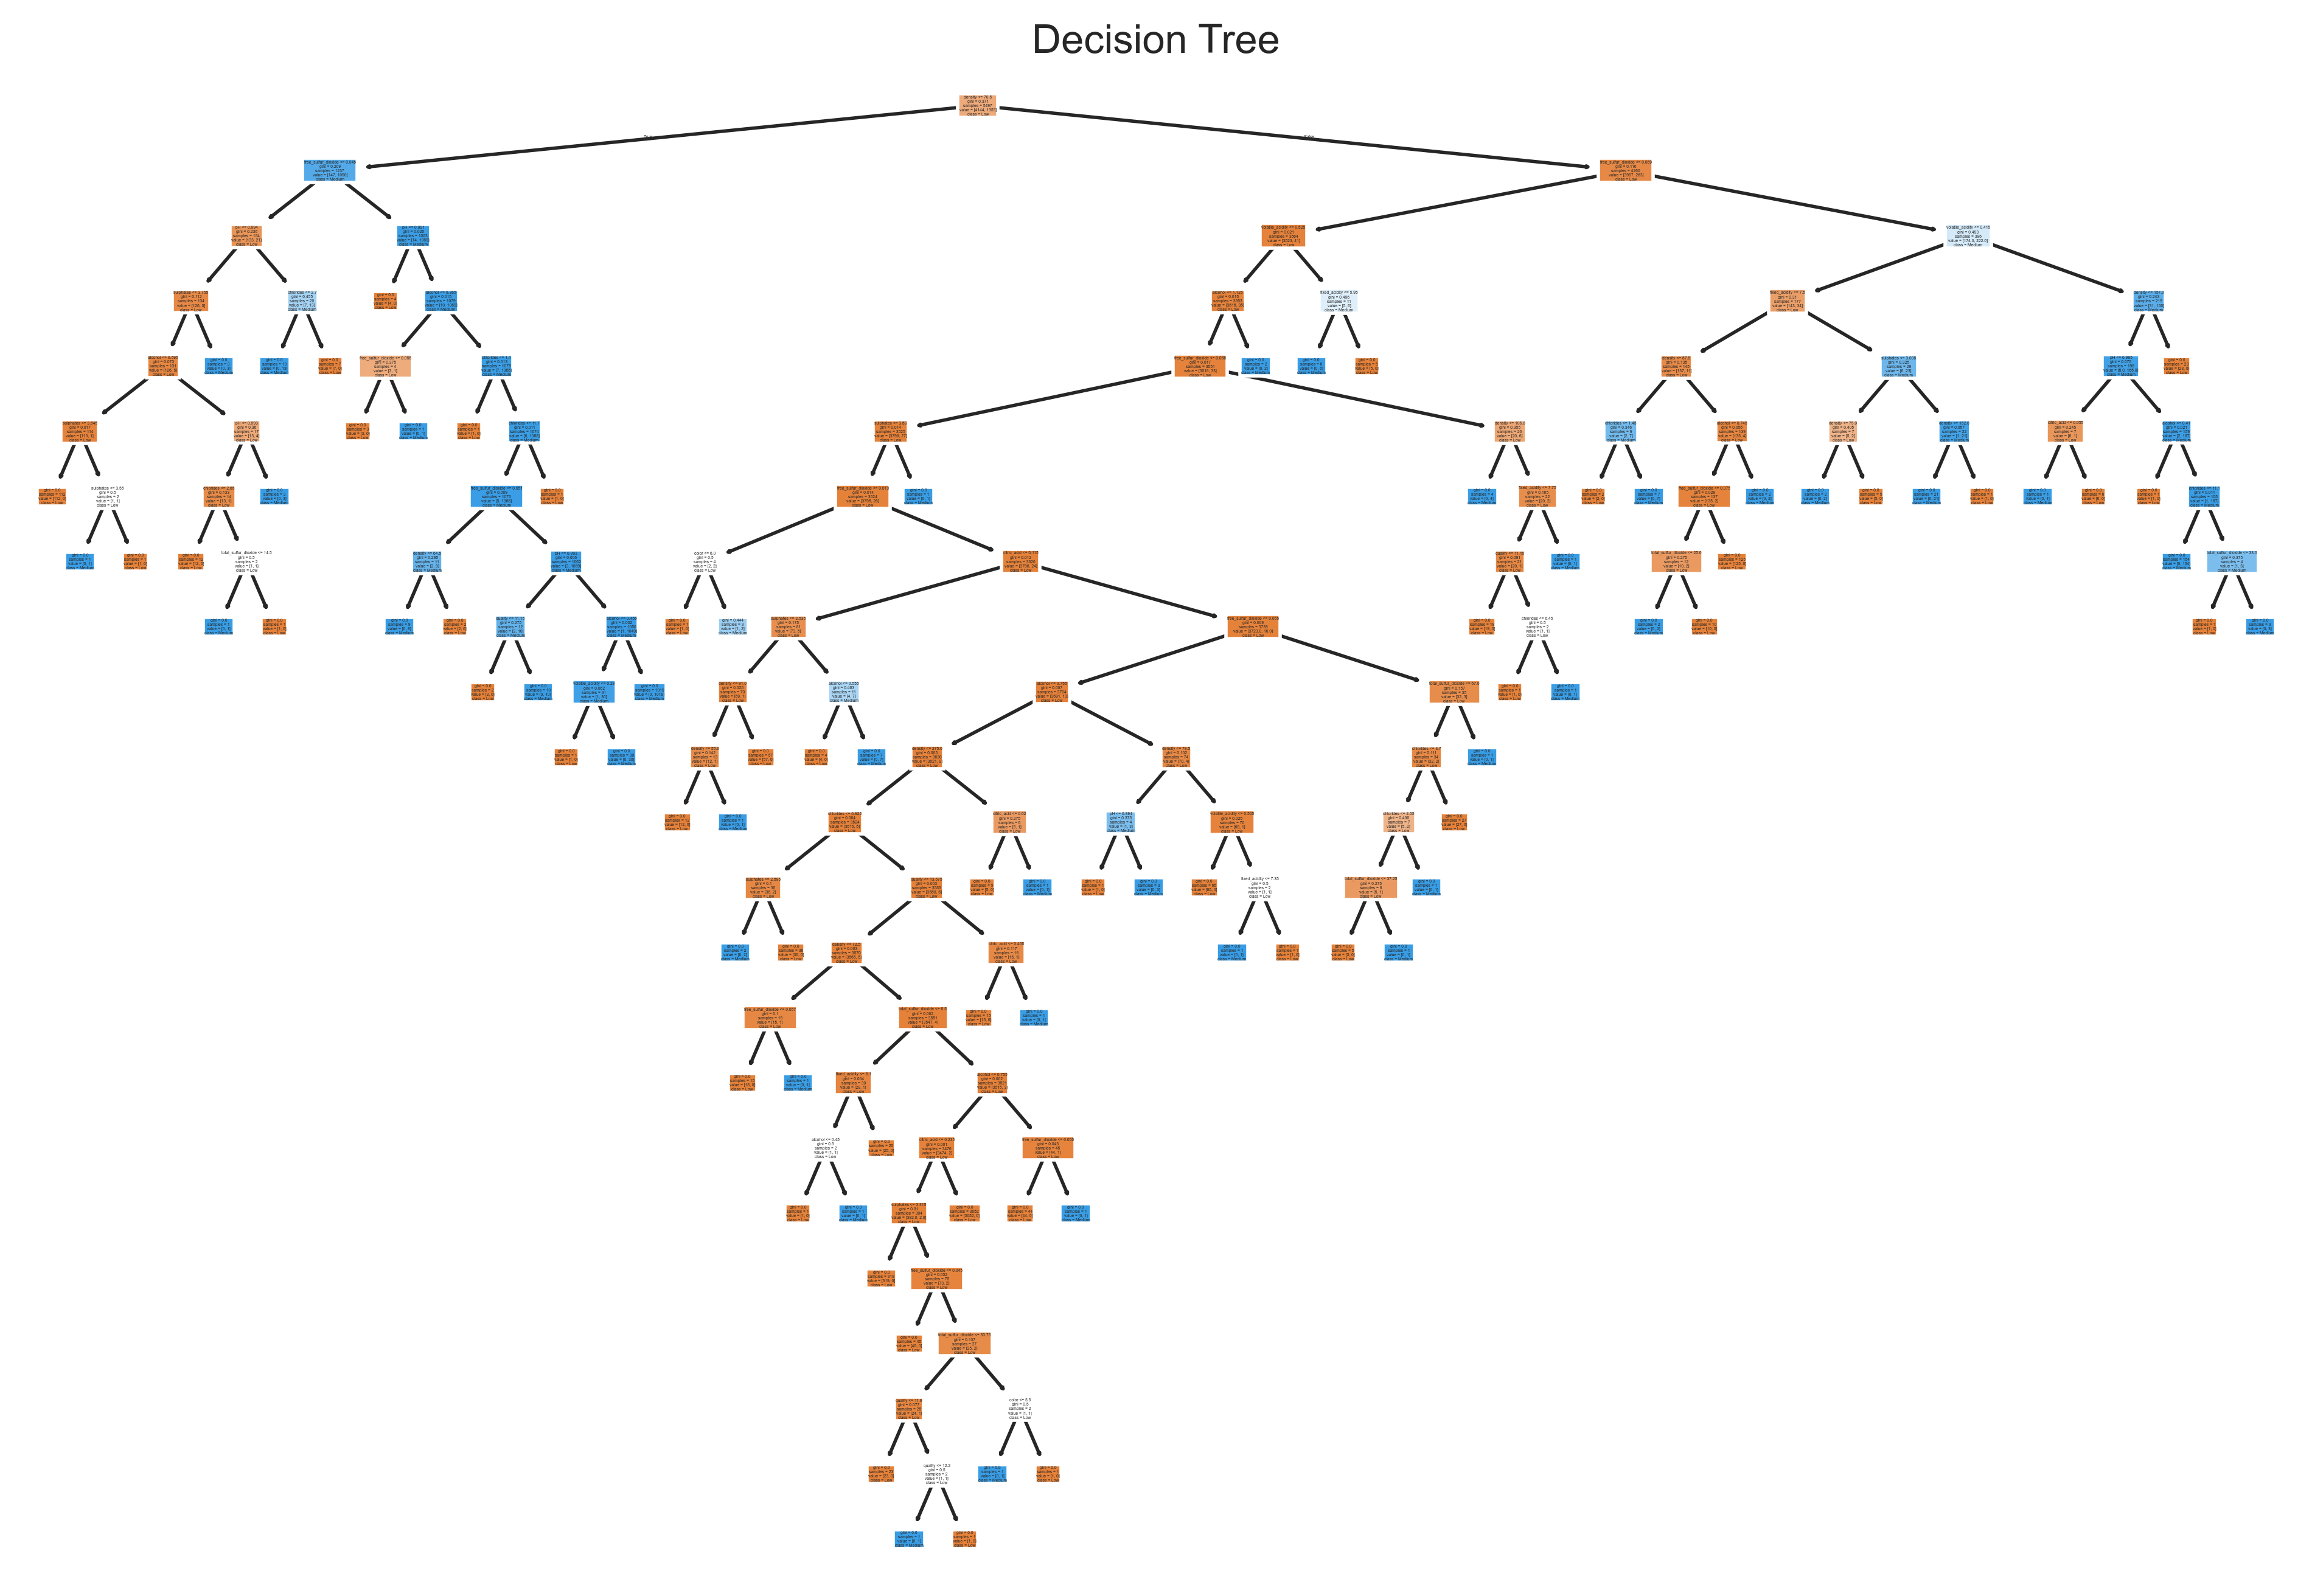

In [26]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']  # Adjust this based on your dataset

# For the original decision tree (assuming `dt` is your trained model)
plt.figure(figsize=(12, 8), dpi= 400)
plot_tree(dt, filled=True, feature_names=feature_cols, class_names=['Low', 'Medium', 'High'])  # Adjust class names as needed
plt.title('Decision Tree')
plt.savefig('wine_tree.png')  # Save the tree as an image
plt.show()

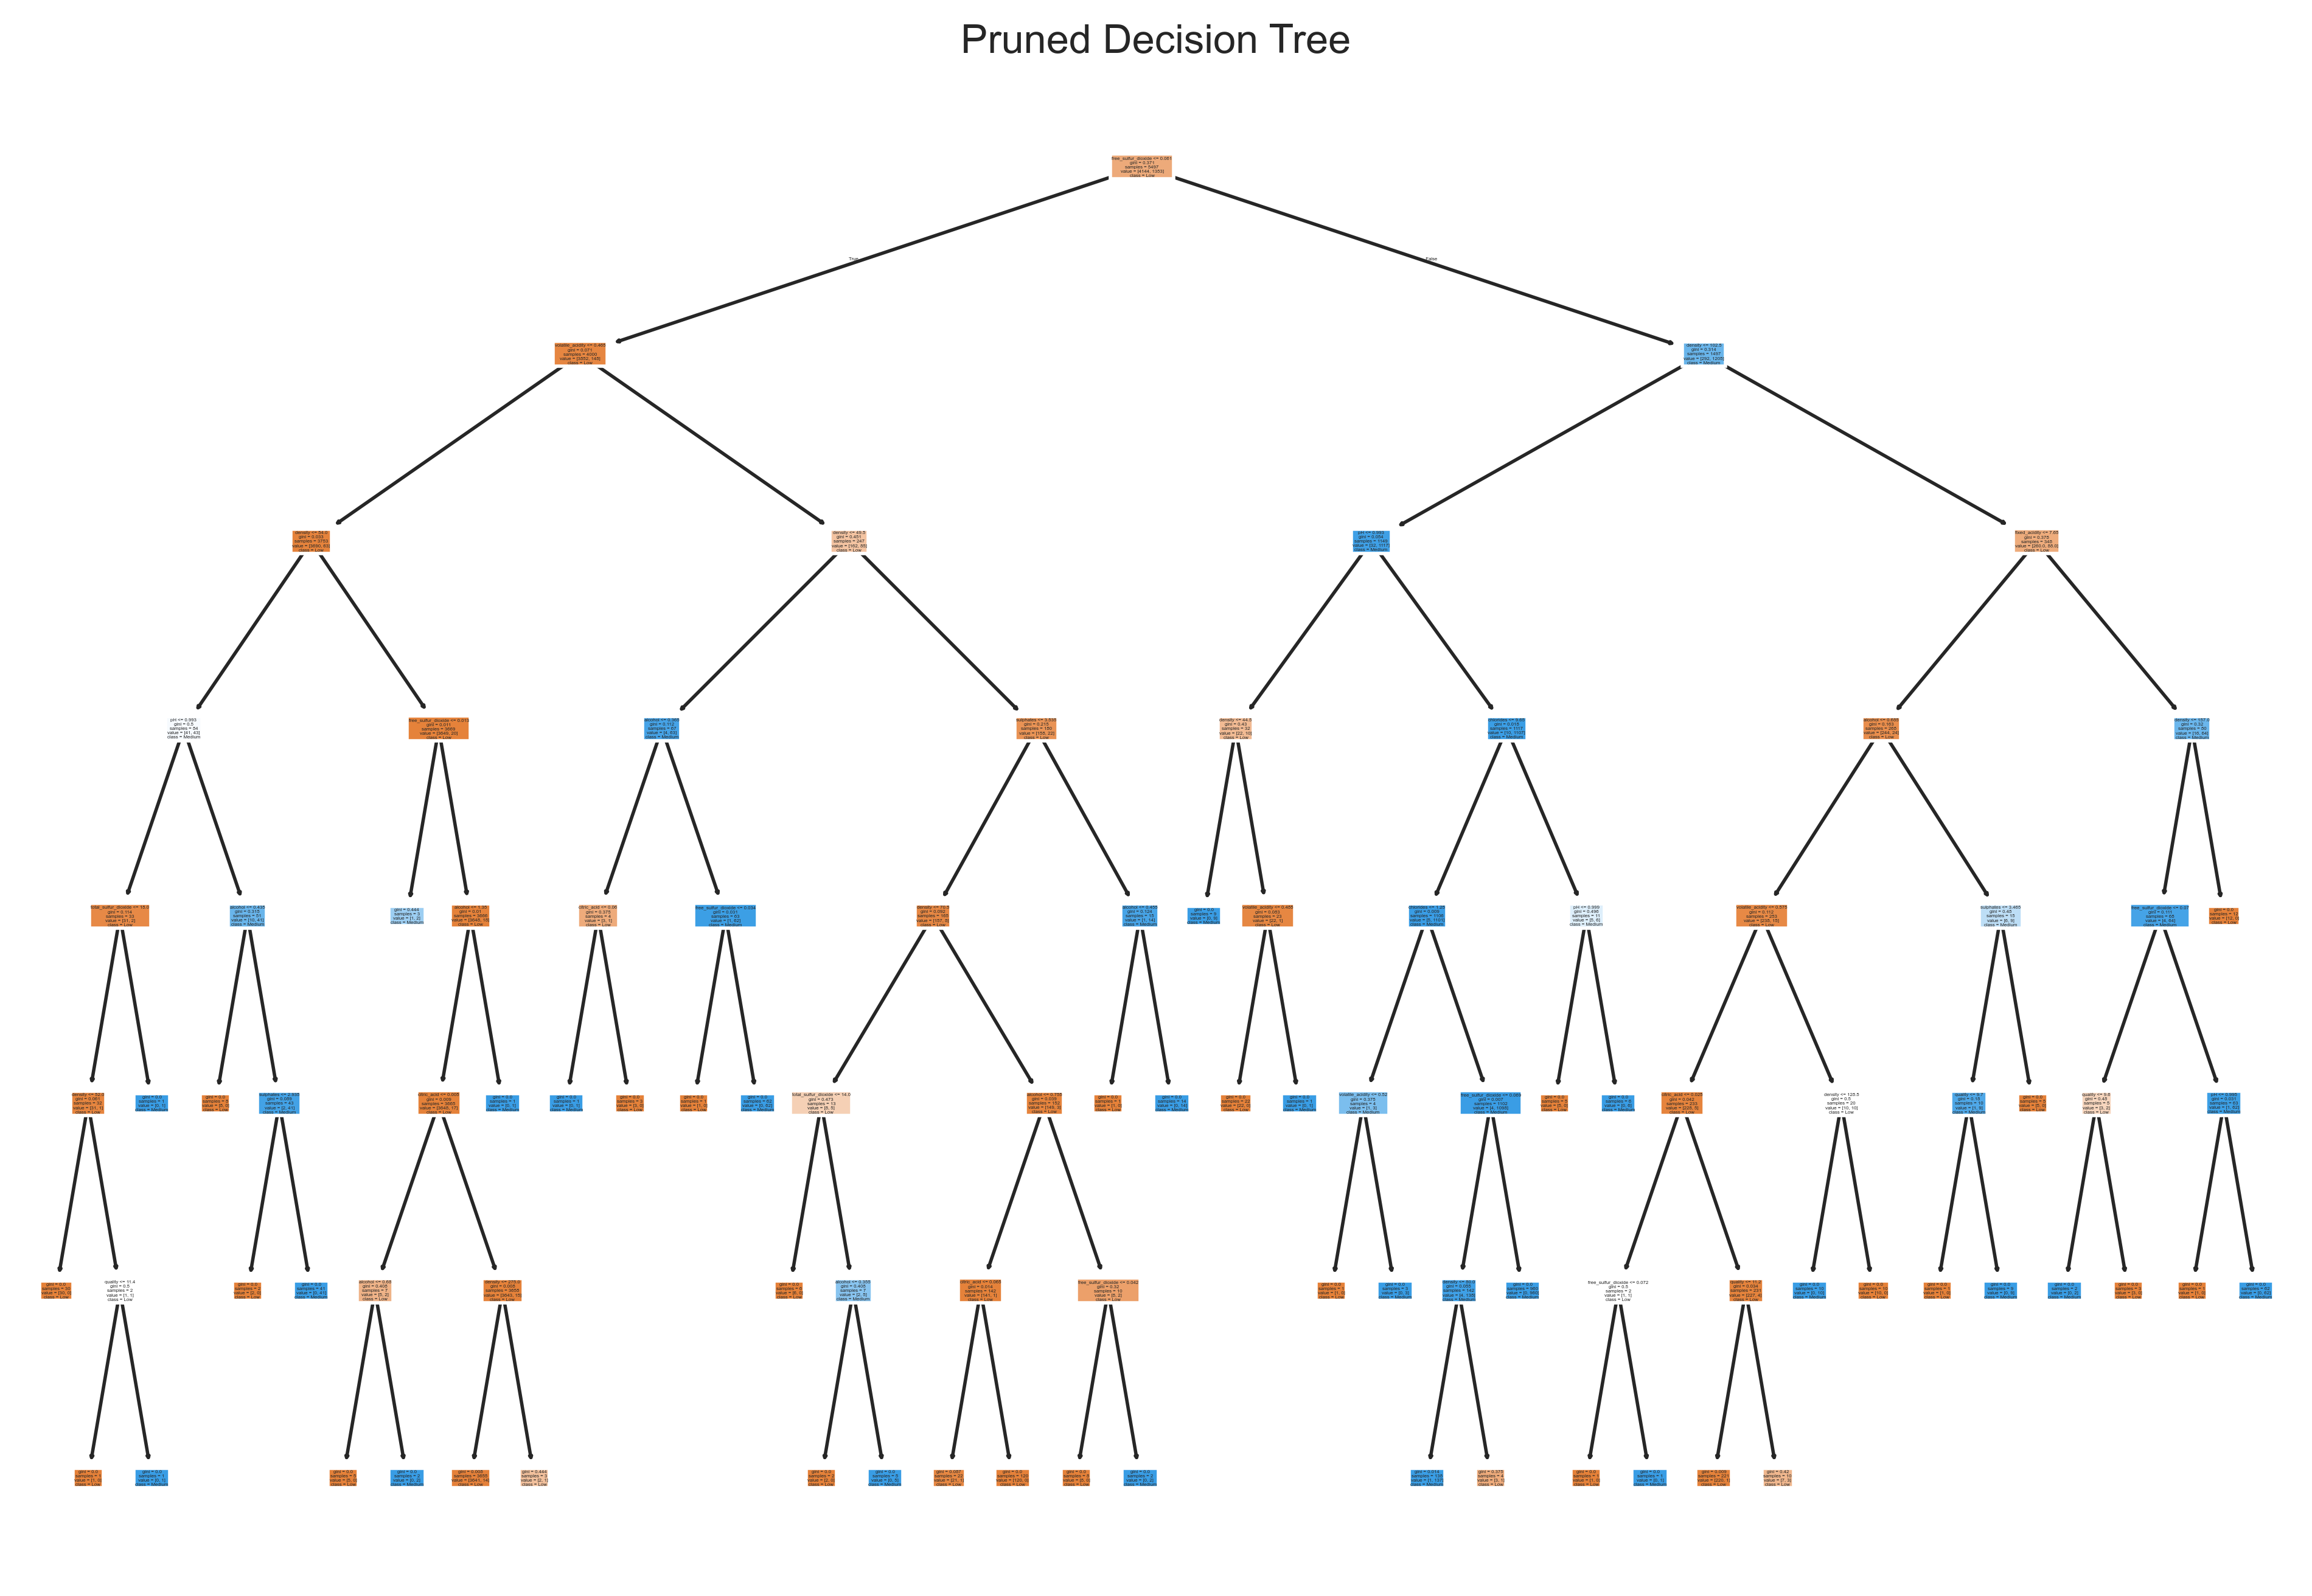

In [27]:
best_tree = GR.best_estimator_

plt.figure(figsize=(12, 8), dpi= 400)
plot_tree(best_tree, filled=True, feature_names=feature_cols, class_names=['Low', 'Medium', 'High'])  # Adjust class names as needed
plt.title('Pruned Decision Tree')
plt.savefig('wine_tree_prune.png')  # Save the pruned tree as an image
plt.show()

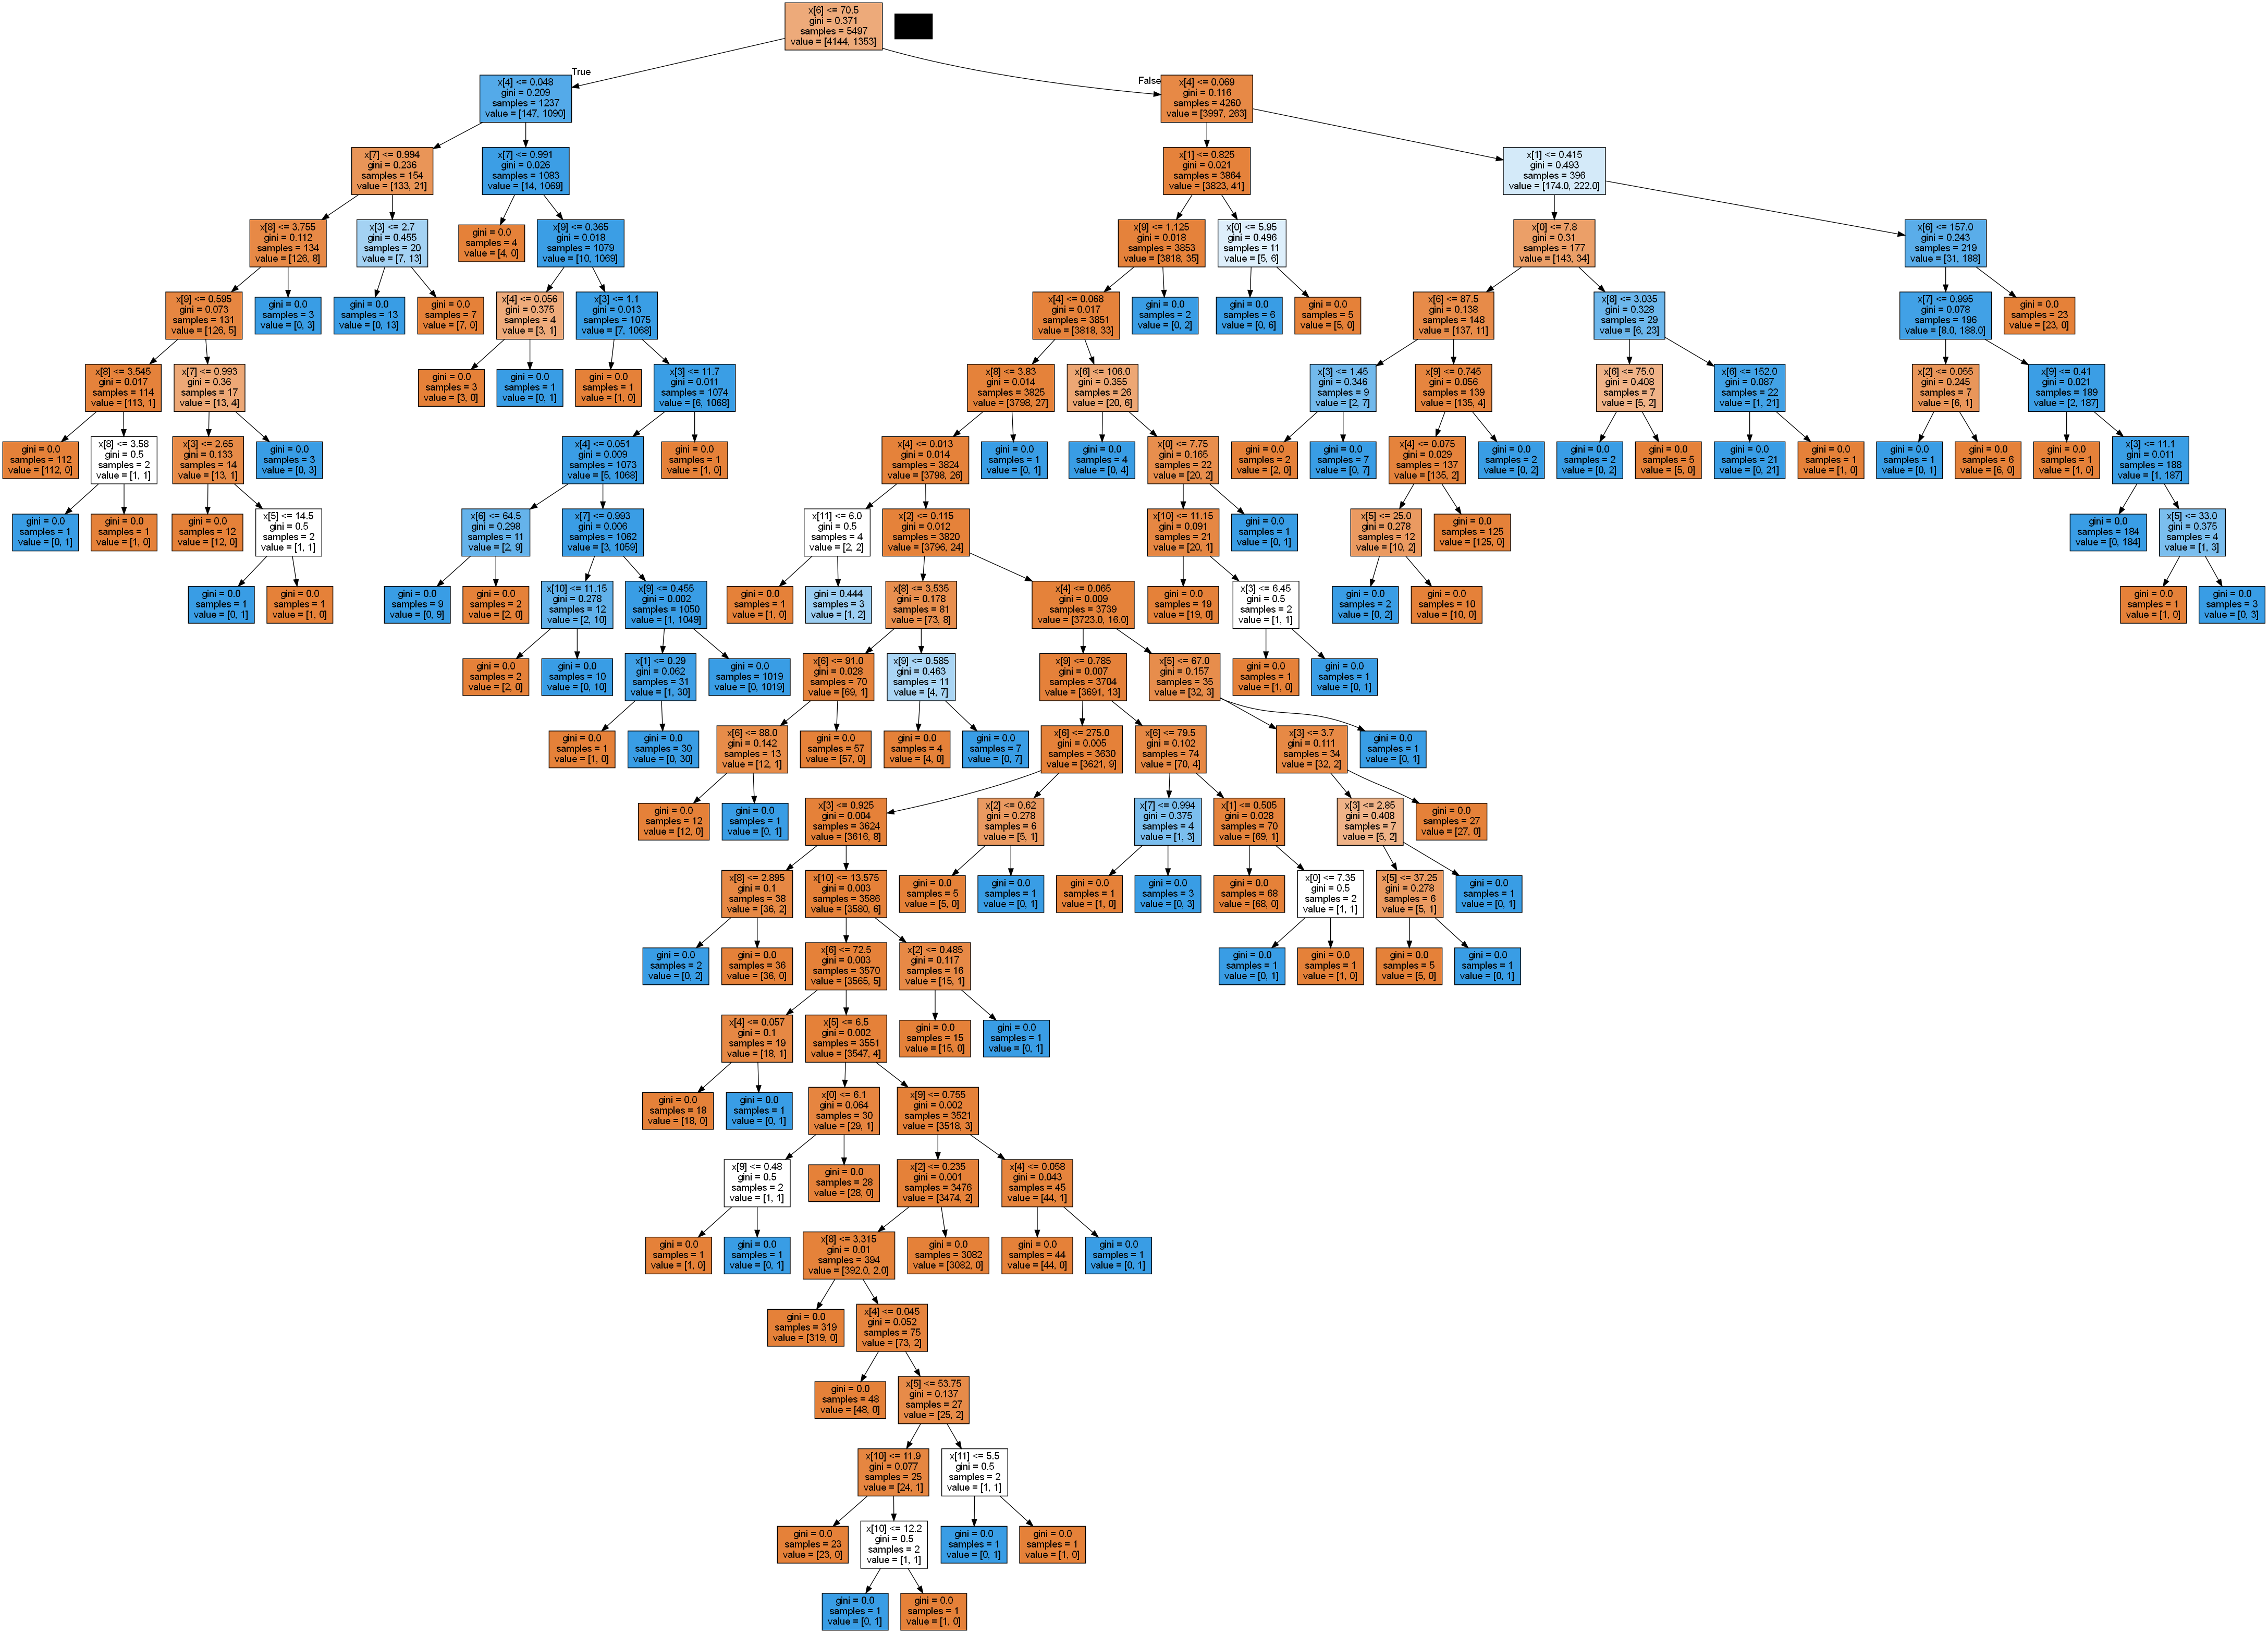

In [28]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'wine_graph.png'
graph.write_png(filename)
Image(filename = filename)

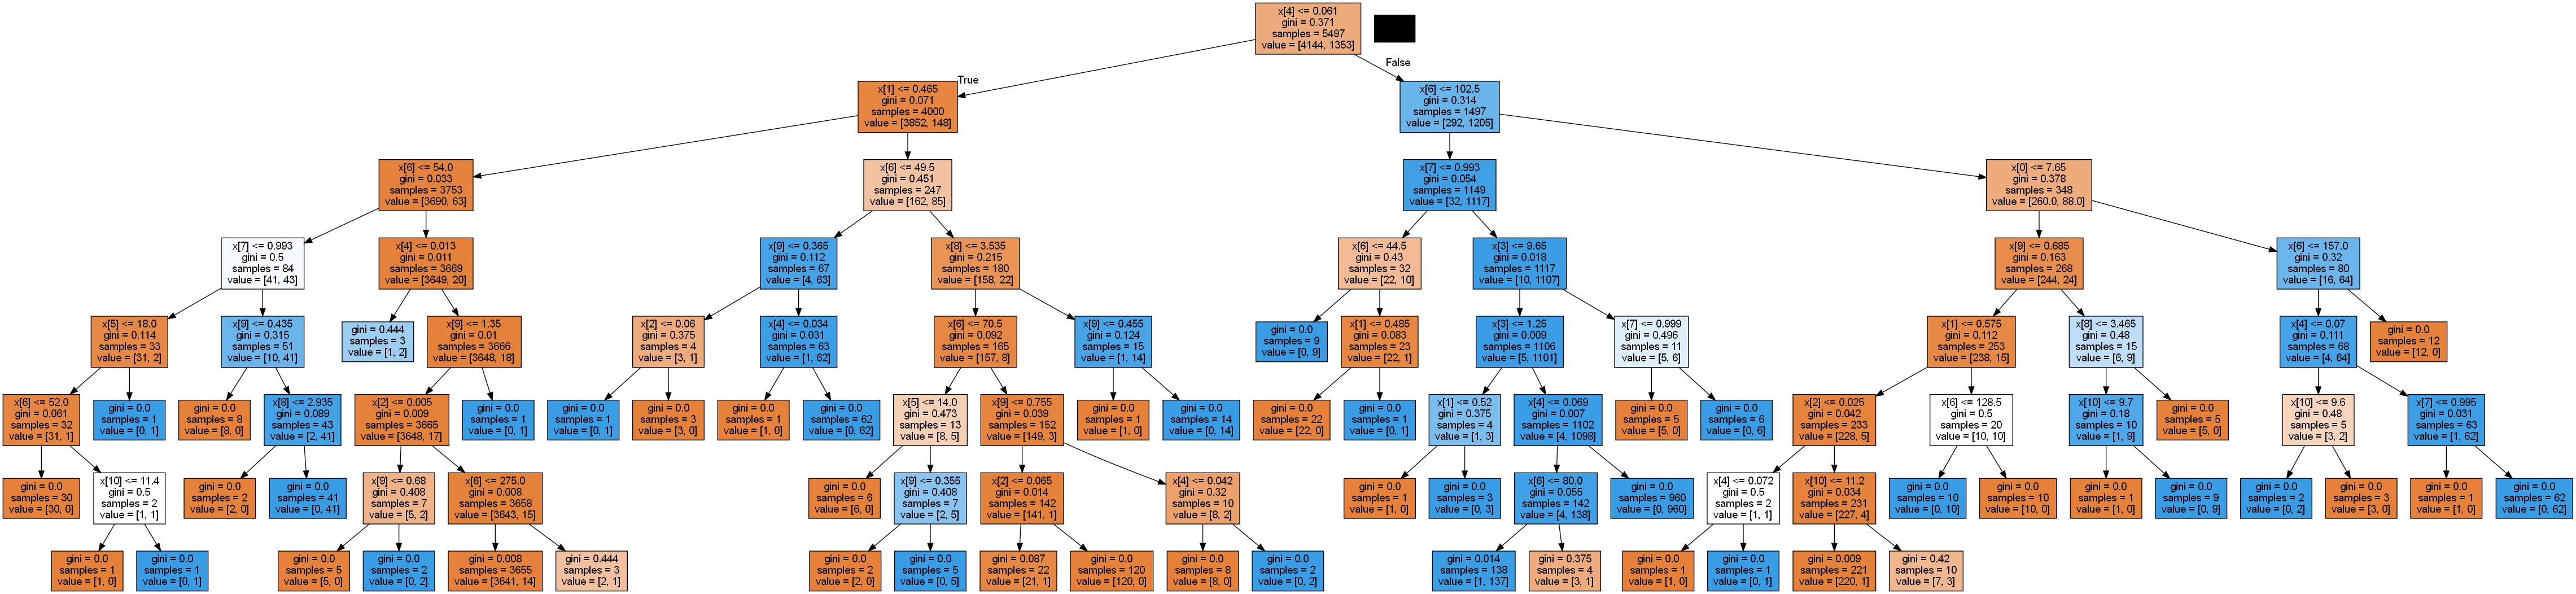

In [29]:
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'wine_graph_prune.png'
graph.write_png(filename)
Image(filename = filename)